In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras import Sequential
from keras.layers import Dense,LSTM,Dropout

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2016-05-31  309.163025  321.548615  305.113922  318.547485  285.649963   
2016-06-01  320.024231  323.549377  313.831451  316.451477  283.770416   
2016-06-02  316.308563  325.740662  314.736542  324.549744  291.032318   
2016-06-03  327.741394  331.838165  320.500610  322.548981  289.238159   
2016-06-06  319.166779  324.597382  316.451477  321.882080  288.640167   

                Volume  
Date                    
2016-05-31  10540175.0  
2016-06-01   6804641.0  
2016-06-02   5849447.0  
2016-06-03   9270545.0  
2016-06-06   5216325.0  


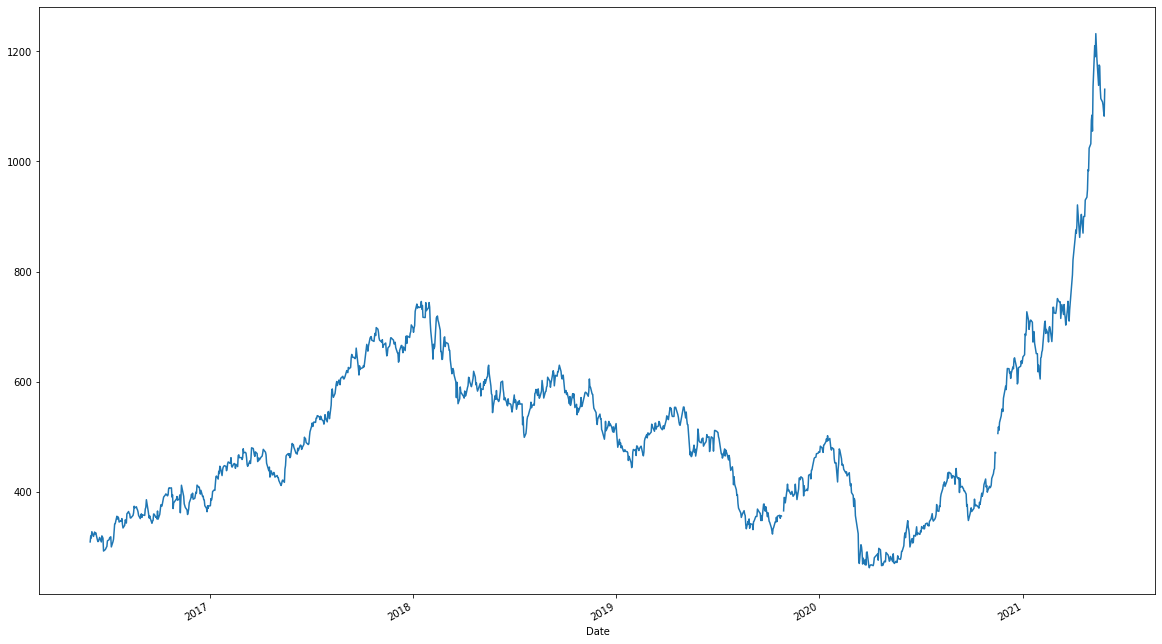

In [3]:
df=pd.read_csv('C:\\Users\\HP-PC\Documents\\ML\\TATASTEEL.csv',index_col='Date',parse_dates=True)
print(df.columns)
print(df.head())
plt.figure(figsize=(20,12))
df['Open'].plot()
plt.show()

In [4]:
df2=df[['Open','High','Low','Close','Volume']]
print(df2.head())

scaler=MinMaxScaler()

train1=df2.iloc[:210,:]
print(train1.tail())
train=scaler.fit_transform(train1)
test=df2.tail(40)
train

                  Open        High         Low       Close      Volume
Date                                                                  
2016-05-31  309.163025  321.548615  305.113922  318.547485  10540175.0
2016-06-01  320.024231  323.549377  313.831451  316.451477   6804641.0
2016-06-02  316.308563  325.740662  314.736542  324.549744   5849447.0
2016-06-03  327.741394  331.838165  320.500610  322.548981   9270545.0
2016-06-06  319.166779  324.597382  316.451477  321.882080   5216325.0
                  Open        High         Low       Close     Volume
Date                                                                 
2017-03-29  459.219055  461.981995  457.551758  461.505615  3426247.0
2017-03-30  461.505615  463.363464  453.312103  454.931732  4872756.0
2017-03-31  457.932861  462.934723  456.408478  459.885986  3374811.0
2017-04-03  463.029999  466.745667  459.981262  462.887085  3296034.0
2017-04-05  464.935486  474.653381  463.649292  469.984985  5163708.0


array([[0.08843704, 0.12716617, 0.11868193, 0.12441304, 0.63785294],
       [0.14637864, 0.13786961, 0.1640238 , 0.11293685, 0.34282819],
       [0.12655656, 0.14959229, 0.16873139, 0.157277  , 0.26738895],
       ...,
       [0.88208389, 0.88353712, 0.90559963, 0.89827868, 0.07194732],
       [0.90927574, 0.90392446, 0.9241825 , 0.91471049, 0.06572567],
       [0.919441  , 0.94622823, 0.94326076, 0.95357337, 0.2132307 ]])

In [5]:

X_train=[]
y_train=[]
print(train.shape[0])
for i in range(60,train.shape[0]):
    X_train.append(train[i-60:i])
    y_train.append(train[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
print(X_train.shape)
y_train.shape

210
(150, 60, 5)


(150,)

In [6]:

model=Sequential()
model.add(LSTM(units=100,activation='relu',return_sequences=True,input_shape=(X_train.shape[1],5)))
model.add(Dropout(0.2))
model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=1))

model.compile(optimizer='adam',loss='mean_squared_error')
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 100)           42400     
_________________________________________________________________
dropout (Dropout)            (None, 60, 100)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 80)            57920     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            33840     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 80)                4

Epoch 1/50
3/3 [==============================] - 1s 233ms/step - loss: 0.0126 - val_loss: 0.0024
Epoch 2/50
3/3 [==============================] - 1s 202ms/step - loss: 0.0105 - val_loss: 0.0036
Epoch 3/50
3/3 [==============================] - 1s 204ms/step - loss: 0.0091 - val_loss: 0.0031
Epoch 4/50
3/3 [==============================] - 1s 188ms/step - loss: 0.0082 - val_loss: 0.0025
Epoch 5/50
3/3 [==============================] - 1s 188ms/step - loss: 0.0098 - val_loss: 0.0027
Epoch 6/50
3/3 [==============================] - 1s 184ms/step - loss: 0.0159 - val_loss: 0.0024
Epoch 7/50
3/3 [==============================] - 1s 180ms/step - loss: 0.0160 - val_loss: 0.0076
Epoch 8/50
3/3 [==============================] - 1s 184ms/step - loss: 0.0196 - val_loss: 0.0343
Epoch 9/50
3/3 [==============================] - 1s 180ms/step - loss: 0.0196 - val_loss: 0.0266
Epoch 10/50
3/3 [==============================] - 1s 196ms/step - loss: 0.0158 - val_loss: 0.0100
Epoch 11/50
3/3 [==

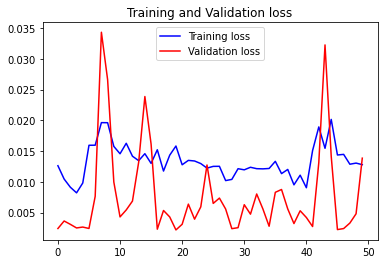

In [11]:

history=model.fit(X_train,y_train,epochs=50,batch_size=50,validation_split=.1)

loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(loss))
plt.figure()
plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [12]:
part_60=train1.tail(60)
df3=part_60.append(test,ignore_index=True)
print(df3.head())

         Open        High         Low       Close      Volume
0  400.625763  405.294159  395.957336  399.720642   4343359.0
1  403.674500  404.150879  399.530121  402.054871   3277683.0
2  402.721771  412.058594  402.626495  411.486969   5372486.0
3  414.726257  429.636597  414.106995  427.064209  11998331.0
4  427.778748  429.827148  422.300507  426.397278   5627446.0


In [13]:
inputs=scaler.transform(df3)
X_test=[]
y_test=[]
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i,0])

X_test,y_test=np.array(X_test),np.array(y_test)
X_train.shape

Y_pred=model.predict(X_test)
scaler.scale_

array([5.33472955e-03, 5.34968365e-03, 5.20122940e-03, 5.47526424e-03,
       7.89779308e-08])

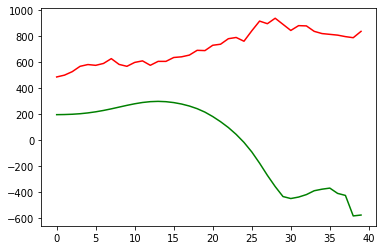

In [14]:
scale=1/5.33472955e-03
Y_test=y_test*scale
Y_pred=Y_pred*scale

plt.plot(Y_test,color='red')
plt.plot(Y_pred,color='green')
plt.show()